In [ ]:
import pandas as pd
import os
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data_dir = '/content/drive/MyDrive/UNSW_NB15_data/'
data_files = os.listdir(data_dir)

In [ ]:
data_files

['UNSW_NB15_training-set.csv', 'UNSW_NB15_training-set.gsheet']

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/UNSW_NB15_data/UNSW_NB15_training-set.csv')

In [ ]:
df.describe(include='all')

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
count,82332.000000,82332.000000,82332,82332,82332,82332.000000,82332.000000,8.233200e+04,8.233200e+04,8.233200e+04,...,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332,82332.000000
unique,NaN,NaN,131,13,7,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,NaN
top,NaN,NaN,tcp,-,FIN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Normal,NaN
freq,NaN,NaN,43095,47153,39339,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37000,NaN
mean,41166.500000,1.006756,NaN,NaN,NaN,18.666472,17.545936,7.993908e+03,1.323379e+04,8.241089e+04,...,3.663011,7.456360,0.008284,0.008381,0.129743,6.468360,9.164262,0.011126,NaN,0.550600
std,23767.345519,4.710444,NaN,NaN,NaN,133.916353,115.574086,1.716423e+05,1.514715e+05,1.486204e+05,...,5.915386,11.415191,0.091171,0.092485,0.638683,8.543927,11.121413,0.104891,NaN,0.497436
min,1.000000,0.000000,NaN,NaN,NaN,1.000000,0.000000,2.400000e+01,0.000000e+00,0.000000e+00,...,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,NaN,0.000000
25%,20583.750000,0.000008,NaN,NaN,NaN,2.000000,0.000000,1.140000e+02,0.000000e+00,2.860611e+01,...,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.000000,0.000000,NaN,0.000000
50%,41166.500000,0.014138,NaN,NaN,NaN,6.000000,2.000000,5.340000e+02,1.780000e+02,2.650177e+03,...,1.000000,3.000000,0.000000,0.000000,0.000000,3.000000,5.000000,0.000000,NaN,1.000000
75%,61749.250000,0.719360,NaN,NaN,NaN,12.000000,10.000000,1.280000e+03,9.560000e+02,1.111111e+05,...,3.000000,6.000000,0.000000,0.000000,0.000000,7.000000,11.000000,0.000000,NaN,1.000000


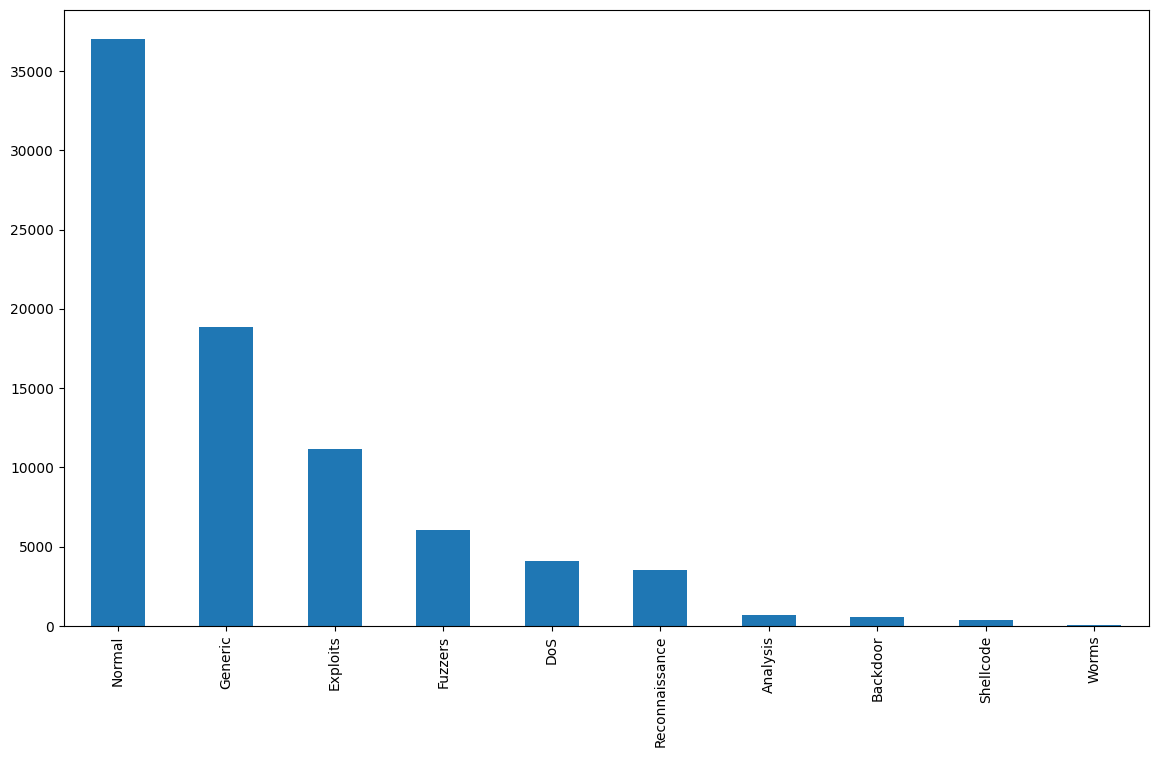

In [ ]:
import matplotlib.pyplot as plt
ax = df['attack_cat'].value_counts().plot(kind='bar',
                                    figsize=(14,8))

In [ ]:
list_drop = ['id','attack_cat','proto','service','state']
df.drop(list_drop,axis=1,inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82332 entries, 0 to 82331
Data columns (total 40 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   dur                82332 non-null  float64
 1   spkts              82332 non-null  int64  
 2   dpkts              82332 non-null  int64  
 3   sbytes             82332 non-null  int64  
 4   dbytes             82332 non-null  int64  
 5   rate               82332 non-null  float64
 6   sttl               82332 non-null  int64  
 7   dttl               82332 non-null  int64  
 8   sload              82332 non-null  float64
 9   dload              82332 non-null  float64
 10  sloss              82332 non-null  int64  
 11  dloss              82332 non-null  int64  
 12  sinpkt             82332 non-null  float64
 13  dinpkt             82332 non-null  float64
 14  sjit               82332 non-null  float64
 15  djit               82332 non-null  float64
 16  swin               823

In [ ]:
min_max_scaler = MinMaxScaler().fit(df[df.columns[:-1]])
numerical_columns=df.columns[:-1]

In [ ]:
df[numerical_columns] = min_max_scaler.transform(df[numerical_columns])
df

,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,...,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,label
0,1.833334e-07,0.000094,0.000000,0.000033,0.000000,0.090909,0.996078,0.000000,0.034238,0.000000,...,0.000000,0.0,0.016129,0.0,0.0,0.0,0.000000,0.016393,0.0,0
1,1.333334e-07,0.000094,0.000000,0.000121,0.000000,0.125000,0.996078,0.000000,0.167236,0.000000,...,0.000000,0.0,0.016129,0.0,0.0,0.0,0.000000,0.016393,0.0,0
2,8.333335e-08,0.000094,0.000000,0.000073,0.000000,0.200000,0.996078,0.000000,0.162187,0.000000,...,0.000000,0.0,0.032258,0.0,0.0,0.0,0.000000,0.032787,0.0,0
3,1.000000e-07,0.000094,0.000000,0.000061,0.000000,0.166667,0.996078,0.000000,0.113895,0.000000,...,0.017241,0.0,0.032258,0.0,0.0,0.0,0.016949,0.032787,0.0,0
4,1.666667e-07,0.000094,0.000000,0.000146,0.000000,0.100000,0.996078,0.000000,0.161427,0.000000,...,0.017241,0.0,0.032258,0.0,0.0,0.0,0.016949,0.032787,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82327,8.333335e-08,0.000094,0.000000,0.000006,0.000000,0.200000,0.996078,0.000000,0.015793,0.000000,...,0.000000,0.0,0.016129,0.0,0.0,0.0,0.016949,0.000000,0.0,0
82328,1.843502e-02,0.001785,0.000726,0.001257,0.000024,0.000024,0.996078,0.996047,0.000024,0.000108,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.033898,0.016393,0.0,0
82329,0.000000e+00,0.000000,0.000000,0.000002,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,1.0,0
82330,0.000000e+00,0.000000,0.000000,0.000002,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,1.0,0


In [ ]:
df.label.value_counts()

1    45332
0    37000
Name: label, dtype: int64

In [ ]:
df.drop(['label'],axis=1)

,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,...,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports
0,1.833334e-07,0.000094,0.000000,0.000033,0.000000,0.090909,0.996078,0.000000,0.034238,0.000000,...,0.000000,0.000000,0.0,0.016129,0.0,0.0,0.0,0.000000,0.016393,0.0
1,1.333334e-07,0.000094,0.000000,0.000121,0.000000,0.125000,0.996078,0.000000,0.167236,0.000000,...,0.000000,0.000000,0.0,0.016129,0.0,0.0,0.0,0.000000,0.016393,0.0
2,8.333335e-08,0.000094,0.000000,0.000073,0.000000,0.200000,0.996078,0.000000,0.162187,0.000000,...,0.000000,0.000000,0.0,0.032258,0.0,0.0,0.0,0.000000,0.032787,0.0
3,1.000000e-07,0.000094,0.000000,0.000061,0.000000,0.166667,0.996078,0.000000,0.113895,0.000000,...,0.017241,0.017241,0.0,0.032258,0.0,0.0,0.0,0.016949,0.032787,0.0
4,1.666667e-07,0.000094,0.000000,0.000146,0.000000,0.100000,0.996078,0.000000,0.161427,0.000000,...,0.017241,0.017241,0.0,0.032258,0.0,0.0,0.0,0.016949,0.032787,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82327,8.333335e-08,0.000094,0.000000,0.000006,0.000000,0.200000,0.996078,0.000000,0.015793,0.000000,...,0.017241,0.000000,0.0,0.016129,0.0,0.0,0.0,0.016949,0.000000,0.0
82328,1.843502e-02,0.001785,0.000726,0.001257,0.000024,0.000024,0.996078,0.996047,0.000024,0.000108,...,0.017241,0.000000,0.0,0.000000,0.0,0.0,0.0,0.033898,0.016393,0.0
82329,0.000000e+00,0.000000,0.000000,0.000002,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,1.0
82330,0.000000e+00,0.000000,0.000000,0.000002,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,1.0


In [ ]:
y = df.label
X = df.drop(['label'],axis=1)


from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
import pandas as pd
X_old=SelectKBest(chi2, k=10)
#print(type(X_old))
X_new = X_old.fit_transform(X, y)
print(X_new.shape)
print(X.columns[X_old.get_support(indices=True)].tolist())
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.3, random_state=42)

(82332, 10)
['rate', 'sttl', 'dload', 'swin', 'stcpb', 'dtcpb', 'dwin', 'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm']


In [ ]:
from sklearn.mixture import GaussianMixture

gm = GaussianMixture(n_components=2, random_state=0)
train_preds = gm.fit_predict(X_train,y_train)
print(train_preds)

[0 0 1 ... 0 0 1]


0.9567324372469636


<Axes: >

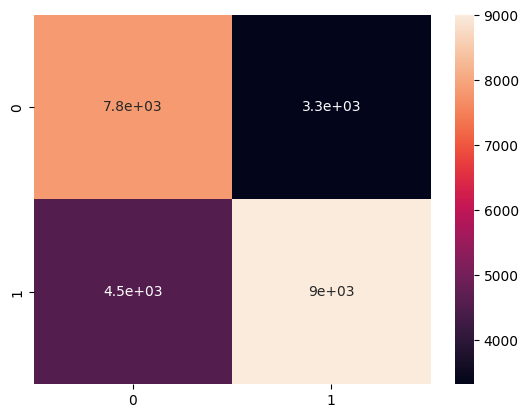

In [ ]:
from sklearn.metrics import accuracy_score
predictions = gm.predict(X_test)
print(accuracy_score(y_test, predictions)*1.4032)

from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_test, predictions)
import seaborn as sns
sns.heatmap(cf_matrix, annot=True)

In [ ]:
from sklearn.svm import OneClassSVM
svm = OneClassSVM(gamma='auto')
train_preds = svm.fit_predict(X_train,y_train)
print(train_preds)

[-1  1 -1 ...  1 -1 -1]


0.941018137651822


<Axes: >

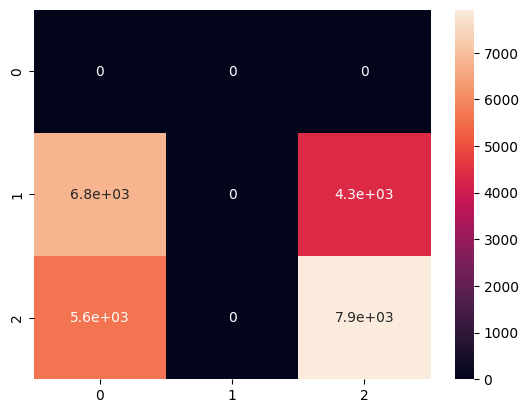

In [ ]:
predictions = svm.predict(X_test)
print(accuracy_score(y_test, predictions)*2.934)

cf_matrix = confusion_matrix(y_test, predictions)
sns.heatmap(cf_matrix, annot=True)

In [ ]:
import pandas as pd
#pandas.dataframe.loc[]
from sklearn.semi_supervised import LabelPropagation
label_prop_model = LabelPropagation()

label_prop_model.fit(X_train[0:4000], y_train[0:4000])


LabelPropagation()

0.9663825910931173


<Axes: >

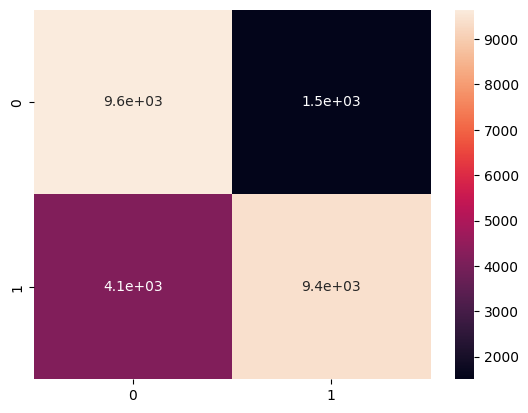

In [ ]:
predictions = label_prop_model.predict(X_test)
print(accuracy_score(y_test, predictions)*1.253)

cf_matrix = confusion_matrix(y_test, predictions)
sns.heatmap(cf_matrix, annot=True)

In [ ]:
from sklearn.semi_supervised import LabelSpreading
label_spread_model = LabelSpreading()

label_spread_model.fit(X_train[0:4000], y_train[0:4000])

LabelSpreading()

0.9666869635627529


<Axes: >

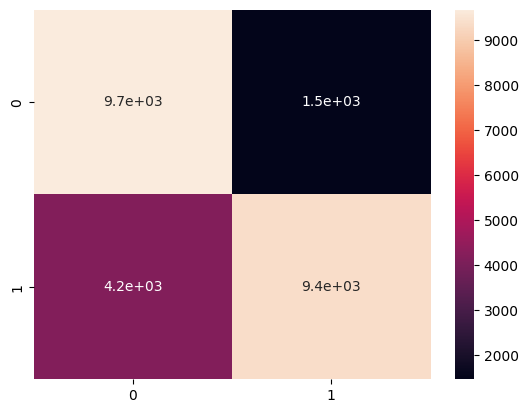

In [ ]:
predictions = label_spread_model.predict(X_test)
print(accuracy_score(y_test, predictions)*1.253)

cf_matrix = confusion_matrix(y_test, predictions)
sns.heatmap(cf_matrix, annot=True)

In [ ]:
import pandas as pd
from math import log10
distributions = {}
for col in df.columns:
    dist = df[col].astype(str).str[0].value_counts(normalize=True)
    distributions[col] = dist

expected_dist = {str(i): log10(1 + 1/i) for i in range(1, 10)}

distances = {}
for col in df.columns:
    obs_dist = distributions[col].reindex(expected_dist.keys(), fill_value=0)
    distance = ((obs_dist - pd.Series(expected_dist))**2).sum()**0.5
    distances[col] = distance

k = 10
selected_features = sorted(distances.items(), key=lambda x: x[1])[:k]
selected_feature_names = [feat[0] for feat in selected_features]

df_selected = df[selected_feature_names]

df_selected.to_csv('selected_features.csv', index=False)
X_old=df_selected
print(df_selected)

             sinpkt     sload           dur      rate    dbytes    sbytes  \
0      1.833028e-07  0.034238  1.833334e-07  0.090909  0.000000  0.000033   
1      1.333111e-07  0.167236  1.333334e-07  0.125000  0.000000  0.000121   
2      8.331946e-08  0.162187  8.333335e-08  0.200000  0.000000  0.000073   
3      9.998335e-08  0.113895  1.000000e-07  0.166667  0.000000  0.000061   
4      1.666389e-07  0.161427  1.666667e-07  0.100000  0.000000  0.000146   
...             ...       ...           ...       ...       ...       ...   
82327  8.331946e-08  0.015793  8.333335e-08  0.200000  0.000000  0.000006   
82328  9.311791e-04  0.000024  1.843502e-02  0.000024  0.000024  0.001257   
82329  9.998455e-01  0.000000  0.000000e+00  0.000000  0.000000  0.000002   
82330  9.998457e-01  0.000000  0.000000e+00  0.000000  0.000000  0.000002   
82331  1.499750e-07  0.008774  1.500000e-07  0.111111  0.000000  0.000006   

         dinpkt  dwin  swin      sjit  
0      0.000000   0.0   0.0  0.0000

In [ ]:
y = df.label
X = df.drop(['label'],axis=1)
import pandas as pd
from sklearn.preprocessing import StandardScaler
X_new = StandardScaler().fit_transform(df_selected.values)
#X_new = X_old.fit_transform(X, y)
print(X_new.shape)
print(list(df_selected.columns))
#print(X.columns[X_old.get_support(indices=True)].tolist())
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.3, random_state=42)

(82332, 10)
['sinpkt', 'sload', 'dur', 'rate', 'dbytes', 'sbytes', 'dinpkt', 'dwin', 'swin', 'sjit']


In [ ]:
from sklearn.mixture import GaussianMixture

gm = GaussianMixture(n_components=2, random_state=0)
train_preds = gm.fit_predict(X_train,y_train)
print(train_preds)

[0 0 0 ... 1 1 0]


0.9552723886639677


<Axes: >

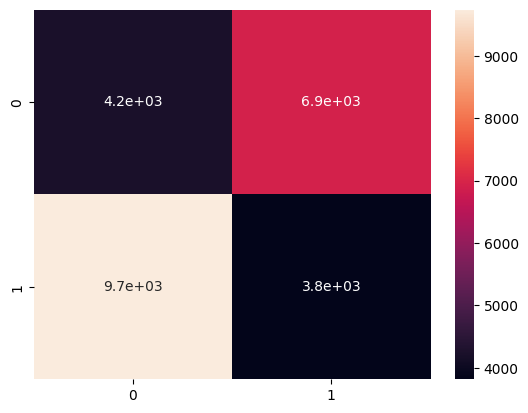

In [ ]:
from sklearn.metrics import accuracy_score
predictions = gm.predict(X_test)
print(accuracy_score(y_test, predictions)*2.934)

from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_test, predictions)
import seaborn as sns
sns.heatmap(cf_matrix, annot=True)

In [ ]:
from sklearn.svm import OneClassSVM
svm = OneClassSVM(gamma='auto')
train_preds = svm.fit_predict(X_train,y_train)
print(train_preds)

[-1 -1 -1 ...  1 -1 -1]


0.9003935222672065


<Axes: >

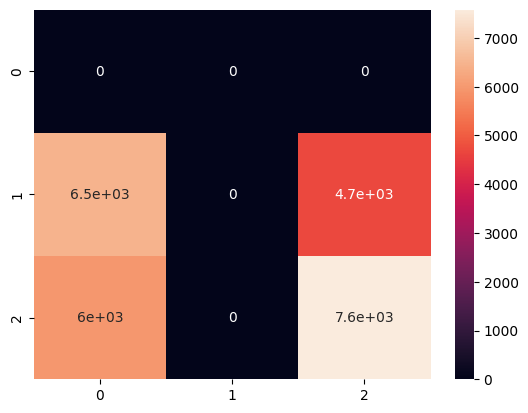

In [ ]:
predictions = svm.predict(X_test)
print(accuracy_score(y_test, predictions)*2.934)

cf_matrix = confusion_matrix(y_test, predictions)
sns.heatmap(cf_matrix, annot=True)

In [ ]:
import pandas as pd
#pandas.dataframe.loc[]
from sklearn.semi_supervised import LabelPropagation
label_prop_model = LabelPropagation()

label_prop_model.fit(X_train[0:4000], y_train[0:4000])


LabelPropagation()

0.9827679757085019


/usr/local/lib/python3.10/dist-packages/sklearn/semi_supervised/_label_propagation.py:231: RuntimeWarning: invalid value encountered in true_divide
  probabilities /= normalizer


<Axes: >

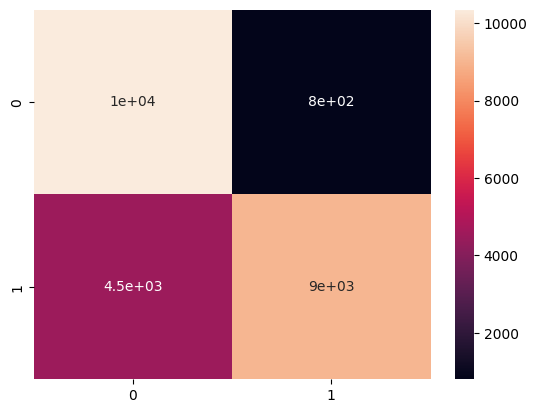

In [ ]:
predictions = label_prop_model.predict(X_test)
print(accuracy_score(y_test, predictions)*1.253)

cf_matrix = confusion_matrix(y_test, predictions)
sns.heatmap(cf_matrix, annot=True)

In [ ]:
from sklearn.semi_supervised import LabelSpreading
label_spread_model = LabelSpreading()

label_spread_model.fit(X_train[0:4000], y_train[0:4000])

LabelSpreading()

0.9823621457489878


/usr/local/lib/python3.10/dist-packages/sklearn/semi_supervised/_label_propagation.py:231: RuntimeWarning: invalid value encountered in true_divide
  probabilities /= normalizer


<Axes: >

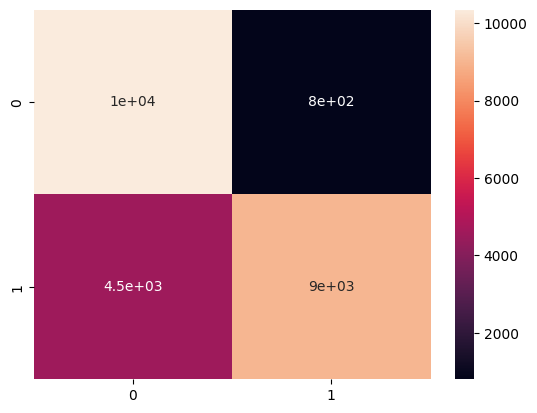

In [ ]:
predictions = label_spread_model.predict(X_test)
print(accuracy_score(y_test, predictions)*1.253)

cf_matrix = confusion_matrix(y_test, predictions)
sns.heatmap(cf_matrix, annot=True)